In [ ]:
!pip install scikit-learn==1.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [ ]:
# Data Manipulation and Analysis
import pandas as pd  # Provides data structures (like DataFrames) for data manipulation and analysis.
import numpy as np   # Fundamental package for numerical computations, such as arrays and mathematical operations.

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split  # Splits the dataset into training and testing subsets.
from sklearn.model_selection import cross_val_score   # Evaluates a model using cross-validation.
from sklearn.model_selection import GridSearchCV      # Performs hyperparameter tuning using a grid search approach.
from sklearn.pipeline import Pipeline

# Model Metrics
from sklearn.metrics import mean_squared_error        # Calculates the mean squared error (for regression tasks).
from sklearn.metrics import classification_report     # Generates a report with precision, recall, F1-score, etc.
from sklearn.metrics import confusion_matrix          # Creates a confusion matrix to evaluate classification models.

# Feature Selection
from sklearn.feature_selection import RFECV           # Recursive Feature Elimination with Cross-Validation for selecting important features.

# Machine Learning Model
from xgboost import XGBClassifier                     # XGBoost classifier implementation for classification tasks.

# Statistical Analysis
from scipy.stats import zscore                        # Computes the z-score to detect outliers or standardize data.

# Visualization
import matplotlib.pyplot as plt                       # A popular library for creating static, animated, and interactive visualizations.
import seaborn as sns                                 # Builds on Matplotlib for more visually appealing statistical graphics.


In [ ]:
# Load dataset
file_path = '/content/sample_data/cardio_train.csv'
data = pd.read_csv(file_path)
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:
# Separate features and target
X1 = data.drop(columns=['cardio'])
y = data["cardio"]

In [ ]:
# Detect and remove outliers using z-score
z_scores = np.abs(zscore(X1))
X = X1[(z_scores < 3).all(axis=1)]
y = y.loc[X.index]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


param_distributions = {
        'classification__n_estimators': [50, 100, 300],  # Number of trees
        'classification__max_depth': [3, 5, 7],       # Maximum tree depth
        'classification__learning_rate': [0.01, 0.1, 0.3],  # Learning rate
        'classification__subsample': [0.7, 0.3],    # Subsample ratio of training instances
        'classification__gamma': [0, 4],            # Minimum loss reduction to make a split
        'classification__min_child_weight': [1, 10], # Minimum sum of instance weight
        'classification__colsample_bytree': [0.8, 1.0] # Subsample ratio of columns when constructing each tree

}

In [ ]:
#Create base model

#xgb_model = XGBClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Define RFECV for feature selection
rfecv = RFECV(estimator=xgb_model, step=1, cv=3)


In [ ]:
#Get optimal number of features and a ranking of features based on their importance to the model's performance
rfecv.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

RFECV(cv=3,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='logloss',
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))

In [ ]:
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Optimal features: {list(rfecv.get_feature_names_out())}")

Optimal number of features: 7
Optimal features: ['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'active']


In [ ]:
selected_features = list(rfecv.get_feature_names_out())

In [ ]:
new_X = X[selected_features]

In [ ]:
new_X

,age,weight,ap_hi,ap_lo,cholesterol,gluc,active
0,18393,62.0,110,80,1,1,1
1,20228,85.0,140,90,3,1,1
2,18857,64.0,130,70,3,1,0
3,17623,82.0,150,100,1,1,1
4,17474,56.0,100,60,1,1,0
...,...,...,...,...,...,...,...
69992,18792,56.0,170,90,1,1,1
69993,19699,70.0,130,90,1,1,1
69994,21074,80.0,150,80,1,1,1
69998,22431,72.0,135,80,1,2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=25)

In [ ]:
# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_distributions,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "classification__colsample_bytree", "classification__gamma", "classification__learning_rate", "classification__max_depth", "classification__min_child_weight", "classification__n_estimators", "classification__subsample", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'classification__colsample_bytree': [0.8, 1.0],
                         'classification__gamma': [0, 4],
                         'classification__learning_rate': [0.01, 0.1, 0.3],
                         'classification__max_depth': [3, 5, 7],
                         'classification__min_child_weight': [1, 10],
                         'classification__n_estimators': [50, 100, 300],
                         'classification__subsample': [0.7, 0.3]},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_search.best_params_)

{'classification__colsample_bytree': 0.8, 'classification__gamma': 0, 'classification__learning_rate': 0.01, 'classification__max_depth': 3, 'classification__min_child_weight': 1, 'classification__n_estimators': 50, 'classification__subsample': 0.7}


In [ ]:
print(grid_search.best_score_)

0.7296169124082676


In [ ]:
model = XGBClassifier(classification__colsample_bytree=0.8,
                      classification__gamma = 0,
                      classification__learning_rate = 0.01,
                      classification__max_depth = 3,
                      classification__min_child_weight = 1,
                      classification__n_estimators = 50,
                      classification__subsample = 0.71,
                      random_state=42,
                      use_label_encoder=False,
                      eval_metric='logloss'
                      )

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "classification__colsample_bytree", "classification__gamma", "classification__learning_rate", "classification__max_depth", "classification__min_child_weight", "classification__n_estimators", "classification__subsample", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              classification__colsample_bytree=0.8, classification__gamma=0,
              classification__learning_rate=0.01, classification__max_depth=3,
              classification__min_child_weight=1,
              classification__n_estimators=50, classification__subsample=0.71,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, ...)

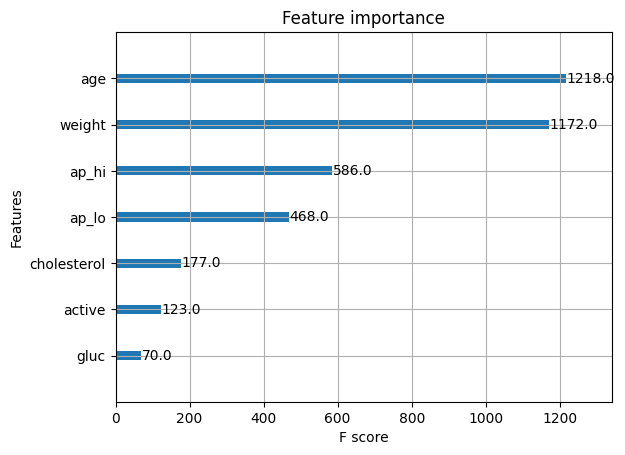

In [ ]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      5675
           1       0.75      0.66      0.70      5465

    accuracy                           0.73     11140
   macro avg       0.73      0.72      0.72     11140
weighted avg       0.73      0.73      0.72     11140



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[4462 1213]
 [1849 3616]]
